# MILK QUALITY CLASSIFICATION

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [117]:
data = pd.read_csv('milknew.csv')
data.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
5,6.6,37,1,1,1,1,255,high
6,5.5,45,1,0,1,1,250,low
7,4.5,60,0,1,1,1,250,low
8,8.1,66,1,0,1,1,255,low
9,6.7,45,1,1,0,0,247,medium


In [82]:
data.shape

(1059, 8)

In [83]:
data.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [84]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


## 1. Clean and prepare the dataset

### Data Preprocessing

In [85]:
data.isna().any()

pH            False
Temprature    False
Taste         False
Odor          False
Fat           False
Turbidity     False
Colour        False
Grade         False
dtype: bool

### Splitting Dependent And Independent Variables

In [86]:
x = data.iloc[:,0:7]
y = data.iloc[:,-1:]

In [87]:
print(x)
print(y)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0     6.6          35      1     0     1          0     254
1     6.6          36      0     1     0          1     253
2     8.5          70      1     1     1          1     246
3     9.5          34      1     1     0          1     255
4     6.6          37      0     0     0          0     255
...   ...         ...    ...   ...   ...        ...     ...
1054  6.7          45      1     1     0          0     247
1055  6.7          38      1     0     1          0     255
1056  3.0          40      1     1     1          1     255
1057  6.8          43      1     0     1          0     250
1058  8.6          55      0     1     1          1     255

[1059 rows x 7 columns]
       Grade
0       high
1       high
2        low
3        low
4     medium
...      ...
1054  medium
1055    high
1056     low
1057    high
1058     low

[1059 rows x 1 columns]


### Encoding Categorical Column Using Label Encoder

In [88]:
le = LabelEncoder()
y['Grade']=le.fit_transform(y['Grade'])

<ipython-input-88-7c4b49ade7fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Grade']=le.fit_transform(y['Grade'])


### Normalize values 

In [89]:
mm = MinMaxScaler()
x = mm.fit_transform(x)
x

array([[0.55384615, 0.01785714, 1.        , ..., 1.        , 0.        ,
        0.93333333],
       [0.55384615, 0.03571429, 0.        , ..., 0.        , 1.        ,
        0.86666667],
       [0.84615385, 0.64285714, 1.        , ..., 1.        , 1.        ,
        0.4       ],
       ...,
       [0.        , 0.10714286, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.58461538, 0.16071429, 1.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.86153846, 0.375     , 0.        , ..., 1.        , 1.        ,
        1.        ]])

## 2. Split the dataset in the ratio 70:30 for train-test split

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=0)

In [91]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(741, 7)
(741, 1)
(318, 7)
(318, 1)


## 3. Build logistic regression model, KNN model, Naïve bayes model and Decision tree model

### Logistic Regression

In [92]:
log_model = LogisticRegression(solver = 'liblinear')
log_model.fit(x_train, y_train)

C:\Users\preet\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [93]:
log_pred = log_model.predict(x_test)

### Decision Tree 

In [94]:
deci = DecisionTreeClassifier(criterion='entropy', random_state=0)  
deci.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [95]:
pred_deci = deci.predict(x_test)  

### LDA

In [97]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(x_train, y_train)
X_test_lda = lda.transform(x_test)

C:\Users\preet\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_lda, y_train)
pred_lda = classifier.predict(X_test_lda)

<ipython-input-98-b44f2fb592d8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_lda, y_train)


## 4. Print the confusion matrix, classification report and accuracy for each model

### Confusion matrix and Classification report

### Logistic Regression

In [99]:
ac = accuracy_score(y_test,log_pred)
cr = classification_report(y_test,log_pred,output_dict=True)
cm = confusion_matrix(y_test,log_pred)

In [100]:
print("The Accuracy for Logistic Regression :",ac)

The Accuracy for Logistic Regression : 0.7012578616352201


In [101]:
print("The classification Report for Logistic Regression :",cr)

The classification Report for Logistic Regression : {'0': {'precision': 0.5333333333333333, 'recall': 0.27906976744186046, 'f1-score': 0.366412213740458, 'support': 86}, '1': {'precision': 0.6470588235294118, 'recall': 0.853448275862069, 'f1-score': 0.7360594795539034, 'support': 116}, '2': {'precision': 0.8333333333333334, 'recall': 0.8620689655172413, 'f1-score': 0.847457627118644, 'support': 116}, 'accuracy': 0.7012578616352201, 'macro avg': {'precision': 0.6712418300653594, 'recall': 0.6648623362737236, 'f1-score': 0.6499764401376685, 'support': 318}, 'weighted avg': {'precision': 0.6842520656061167, 'recall': 0.7012578616352201, 'f1-score': 0.6767277822506128, 'support': 318}}


<AxesSubplot:>

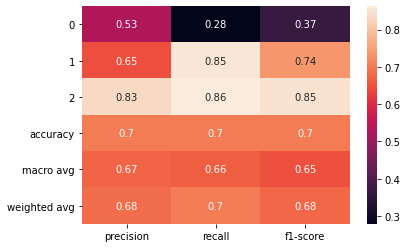

In [102]:
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)

In [103]:
print("The Confusion Matrix for Logistic Regression :",cm)

The Confusion Matrix for Logistic Regression : [[ 24  44  18]
 [ 15  99   2]
 [  6  10 100]]


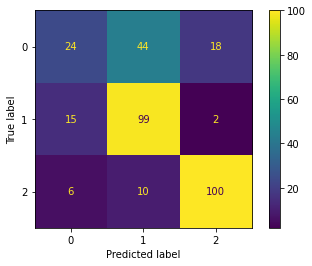

In [104]:
cm_display_log = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display_log.plot()

### Decision Tree

In [105]:
ac1 = accuracy_score(y_test,pred_deci)
cr1 = classification_report(y_test,pred_deci,output_dict=True)
cm1 = confusion_matrix(y_test,pred_deci)

In [106]:
print("The Accuracy for Decision Tree :",ac1)

The Accuracy for Decision Tree : 0.9874213836477987


In [107]:
print("The Classification Report for Decision Tree : ",cr1)

The Classification Report for Decision Tree :  {'0': {'precision': 0.9770114942528736, 'recall': 0.9883720930232558, 'f1-score': 0.9826589595375722, 'support': 86}, '1': {'precision': 1.0, 'recall': 0.9741379310344828, 'f1-score': 0.9868995633187774, 'support': 116}, '2': {'precision': 0.9830508474576272, 'recall': 1.0, 'f1-score': 0.9914529914529915, 'support': 116}, 'accuracy': 0.9874213836477987, 'macro avg': {'precision': 0.9866874472368335, 'recall': 0.9875033413525794, 'f1-score': 0.9870038381031137, 'support': 318}, 'weighted avg': {'precision': 0.9876002729900374, 'recall': 0.9874213836477987, 'f1-score': 0.98741373230741, 'support': 318}}


<AxesSubplot:>

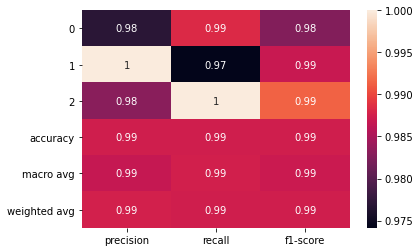

In [108]:
sns.heatmap(pd.DataFrame(cr1).iloc[:-1, :].T, annot=True)

In [109]:
print("The Confusion Matrix for Decision Tree :",cm1)

The Confusion Matrix for Decision Tree : [[ 85   0   1]
 [  2 113   1]
 [  0   0 116]]


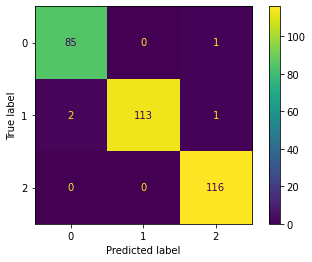

In [110]:
cm_display_deci = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1)

cm_display_deci.plot()

### LDA

In [111]:
ac2 = accuracy_score(y_test,pred_lda)
cr2 = classification_report(y_test,pred_lda,output_dict=True)
cm2 = confusion_matrix(y_test,pred_lda)

C:\Users\preet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\preet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\preet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
print("The Accuracy for LDA :",ac2)

The Accuracy for LDA : 0.5880503144654088


In [113]:
print("The Classification Report for LDA : ",cr2)

The Classification Report for LDA :  {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 86}, '1': {'precision': 0.4691358024691358, 'recall': 0.9827586206896551, 'f1-score': 0.6350974930362117, 'support': 116}, '2': {'precision': 0.9733333333333334, 'recall': 0.6293103448275862, 'f1-score': 0.7643979057591623, 'support': 116}, 'accuracy': 0.5880503144654088, 'macro avg': {'precision': 0.48082304526748976, 'recall': 0.5373563218390804, 'f1-score': 0.46649846626512464, 'support': 318}, 'weighted avg': {'precision': 0.5261837099153661, 'recall': 0.5880503144654088, 'f1-score': 0.5105077555354195, 'support': 318}}


<AxesSubplot:>

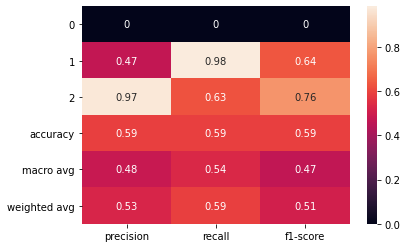

In [114]:
sns.heatmap(pd.DataFrame(cr2).iloc[:-1, :].T, annot=True)

In [115]:
print("The Confusion Matrix for LAD :",cm2)

The Confusion Matrix for LAD : [[  0  86   0]
 [  0 114   2]
 [  0  43  73]]


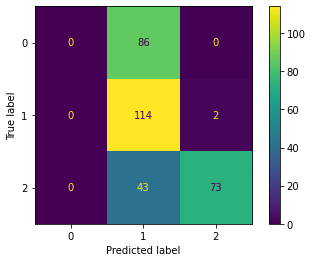

In [116]:
cm_display_lda = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2)

cm_display_lda.plot()